<a href="https://colab.research.google.com/github/Gako3113/Jyagaimo/blob/main/Jyagaimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning
 
 File Name       : Trial.ipynb
 
 Creation Date   : Jun 9 2021
 
 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.
 
 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/mydata_new

Copied images from datasets/mydata_new/1_trimming
Copied images from datasets/mydata_new/2_trimming
Copied images from datasets/mydata_new/3_trimming


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.6.0
class number=3
['1_trimming', '2_trimming', '3_trimming']


Found 235 images belonging to 3 classes.
Found 61 images belonging to 3 classes.
## Train Data Sample ##


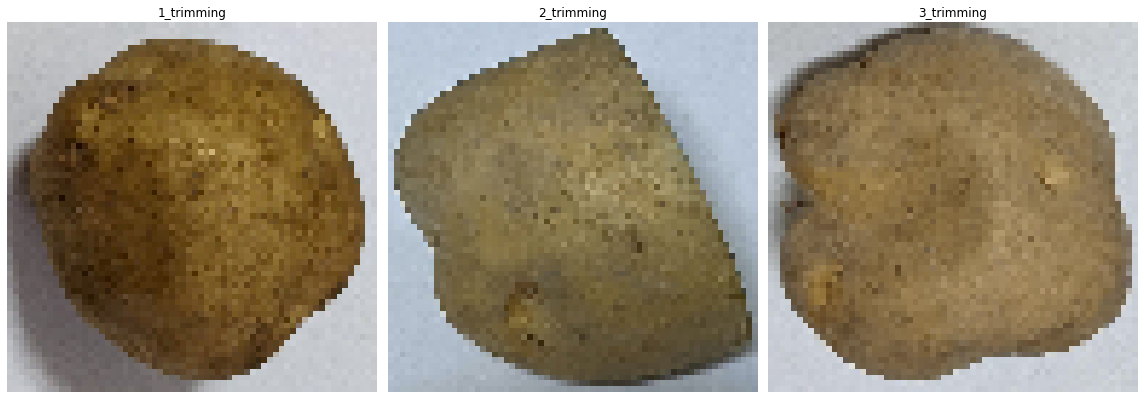

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         5

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 50
# バッチサイズ
BATCH_SIZE = 8

IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(lr=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(lr=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Prediction data
[[0.993 0.007 0.   ]
 [0.93  0.006 0.064]
 [0.998 0.001 0.001]
 [0.99  0.001 0.01 ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [0.996 0.004 0.   ]
 [0.998 0.002 0.   ]
 [0.987 0.013 0.   ]
 [1.    0.    0.   ]
 [0.998 0.001 0.   ]
 [0.982 0.002 0.017]
 [0.981 0.01  0.009]
 [0.977 0.016 0.008]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.997 0.    0.003]
 [0.977 0.018 0.005]
 [0.996 0.002 0.002]
 [1.    0.    0.   ]
 [0.994 0.006 0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.999 0.001 0.   ]
 [0.838 0.093 0.069]
 [0.369 0.034 0.598]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.033 0.965 0.001]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [0.083 0.914 0.004]
 [0.    1.    0.   ]
 [0.    0.952 0.04

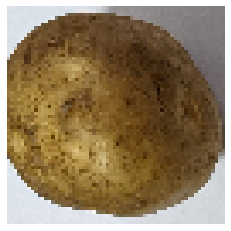

#28 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210909_161008097.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#29 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210909_161022625.jpg-Noise.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#30 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210909_161029432.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#31 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210913_064145275.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.033 0.965 0.001]
* Correct *
#32 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210913_064148919.jpg-Noise.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#33 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210913_064148919.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0. 1. 0.]
* Correct *
#34 Expected:2_trimming -> Predicted:2_trimming
File: 2_trimming/PXL_20210913_06415

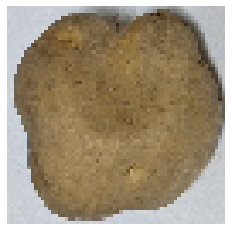

#47 Expected:3_trimming -> Predicted:2_trimming
File: 3_trimming/PXL_20210909_160821097.jpg-Noise.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.    0.928 0.072]
**** INCORRECT ****


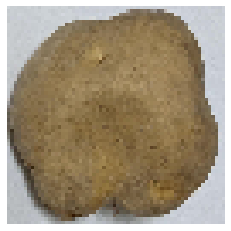

#48 Expected:3_trimming -> Predicted:2_trimming
File: 3_trimming/PXL_20210909_160835610.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.    0.933 0.067]
**** INCORRECT ****


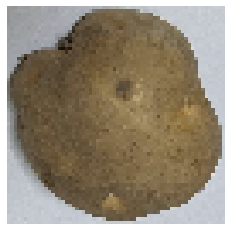

#49 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064344293.jpg-Noise.jpg
Each Prediction Value: [0.179 0.006 0.815]
* Correct *
#50 Expected:3_trimming -> Predicted:1_trimming
File: 3_trimming/PXL_20210913_064344293.jpg-Noise.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.968 0.003 0.03 ]
**** INCORRECT ****


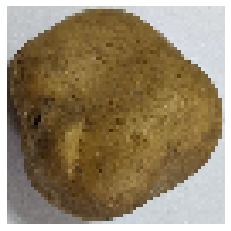

#51 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064347360.jpg
Each Prediction Value: [0.054 0.077 0.869]
* Correct *
#52 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064348110.jpg-Noise.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.042 0.033 0.925]
* Correct *
#53 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064350737.jpg
Each Prediction Value: [0.092 0.013 0.894]
* Correct *
#54 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064351623.jpg
Each Prediction Value: [0.056 0.017 0.927]
* Correct *
#55 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064354103.jpg-Noise.jpg-Noise.jpg
Each Prediction Value: [0.008 0.011 0.981]
* Correct *
#56 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL_20210913_064354664.jpg
Each Prediction Value: [0.063 0.008 0.929]
* Correct *
#57 Expected:3_trimming -> Predicted:3_trimming
File: 3_trimming/PXL

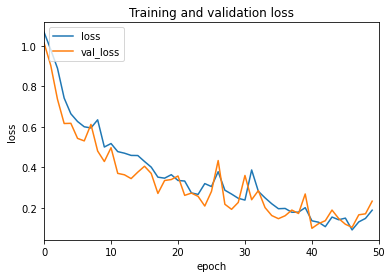

Accuracy


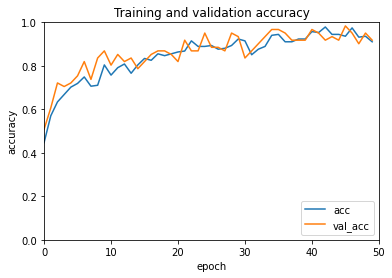

Confusion Matrix


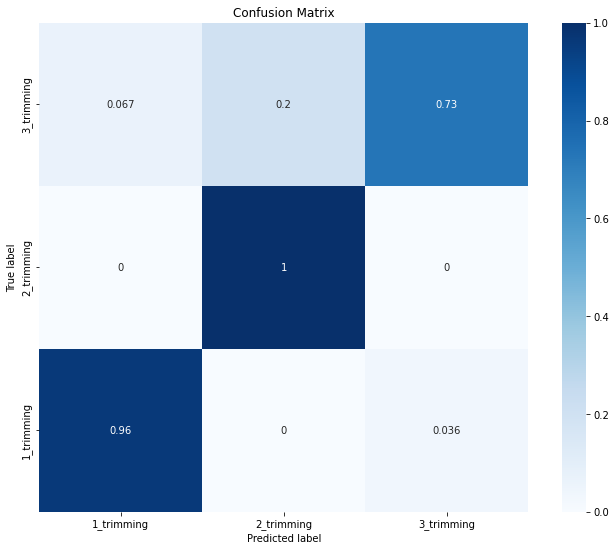

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

Visualize filter: conv2d


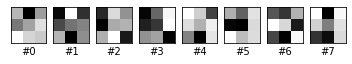

Visualize filter: conv2d_1


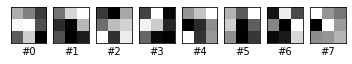

In [ ]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

In [ ]:
!cat incorrect.txt

target_datasets/val/1_trimming/PXL_20210913_064506767.jpg-Noise.jpg-Noise.jpg
target_datasets/val/3_trimming/PXL_20210909_160821097.jpg-Noise.jpg
target_datasets/val/3_trimming/PXL_20210909_160821097.jpg-Noise.jpg-Noise.jpg-Noise.jpg
target_datasets/val/3_trimming/PXL_20210909_160835610.jpg-Noise.jpg-Noise.jpg
target_datasets/val/3_trimming/PXL_20210913_064344293.jpg-Noise.jpg-Noise.jpg-Noise.jpg


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 8)         5

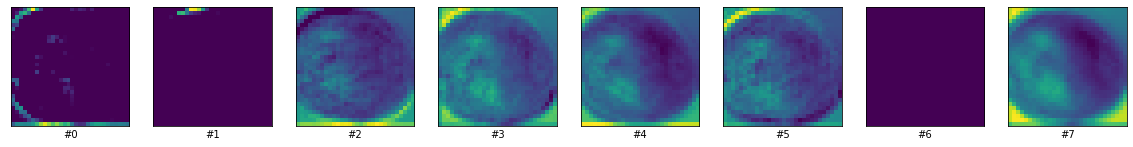

target_datasets/val/3_trimming/PXL_20210909_160821097.jpg-Noise.jpg


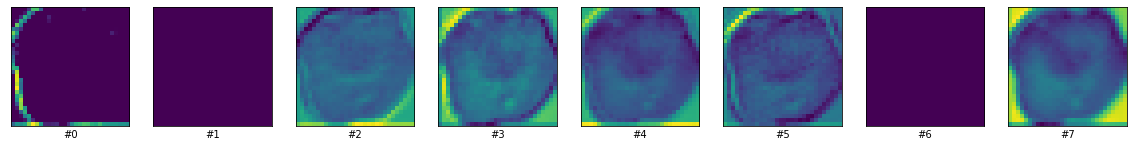

target_datasets/val/3_trimming/PXL_20210909_160821097.jpg-Noise.jpg-Noise.jpg-Noise.jpg


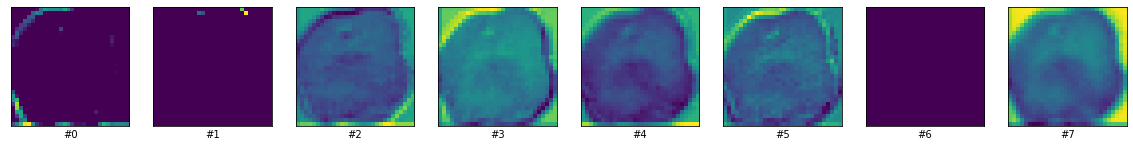

target_datasets/val/3_trimming/PXL_20210909_160835610.jpg-Noise.jpg-Noise.jpg


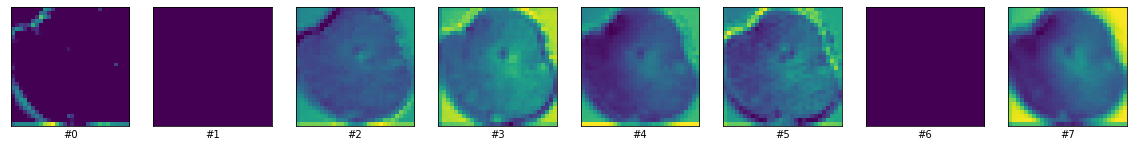

target_datasets/val/3_trimming/PXL_20210913_064344293.jpg-Noise.jpg-Noise.jpg-Noise.jpg


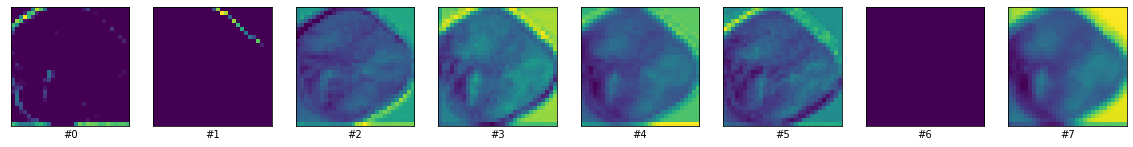

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)

fatal: remote origin already exists.
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'git@github.com:Gako3113/Jyagaimo.git'
